In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('/content/advertising.csv')

In [3]:
# Display basic information and first few rows
print('Dataset Info:')
df.info()
print('\nFirst 5 rows:')
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

First 5 rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
print('\nDescriptive statistics:')
print(df.describe())


Descriptive statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
print('\nMissing values:')
print(df.isnull().sum())


Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [6]:
# Separate features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [7]:
print('\nFeatures (X) shape:', X.shape)
print('Target (y) shape:', y.shape)


Features (X) shape: (200, 3)
Target (y) shape: (200,)


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print('\nX_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


In [10]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print('\nLinear Regression Model Trained.')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Linear Regression Model Trained.
Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127


In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print('\nModel Evaluation:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Model Evaluation:
Mean Squared Error (MSE): 2.91
R-squared (R2): 0.91


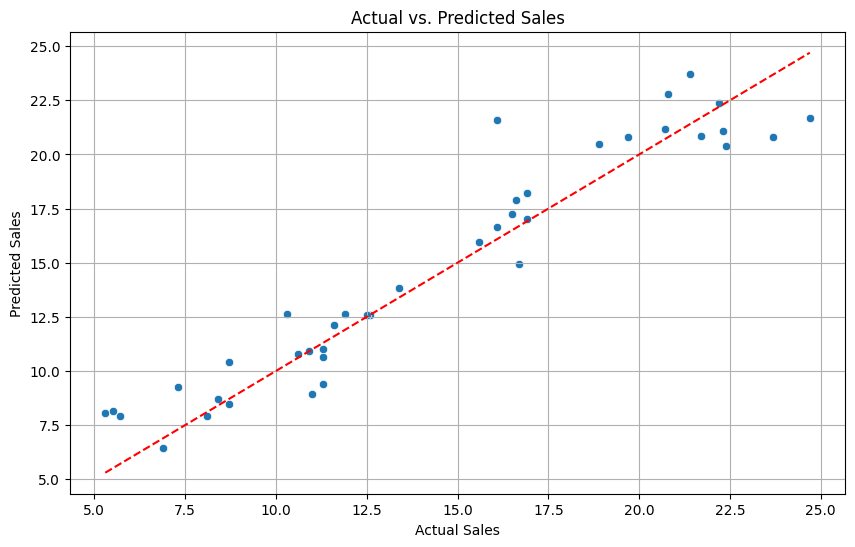

In [15]:
# Visualize actual vs. predicted sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.savefig('actual_vs_predicted_sales.png')
plt.show()

In [16]:
print('\nVisualization saved as actual_vs_predicted_sales.png')


Visualization saved as actual_vs_predicted_sales.png
